# Script for behavioral data analysis across subjects -- pilot experiment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
import scipy as sp
import statsmodels.api as sm

homeDir = '/Users/yvonnefonken/Documents/AnalysisScripts/Catch4CritterBehavioral'
CSVDir  = homeDir + '/subCSV'
resultsDir = homeDir + '/AcrossSubsResults'

In [ ]:
sb.factorplot?

In [2]:
# load data

os.chdir(CSVDir)

#s01 = pd.read_csv('01.csv')
s1 = pd.read_csv('1.csv')
s2 = pd.read_csv('2.csv')
s3 = pd.read_csv('3.csv')
s4 = pd.read_csv('4.csv')
s5 = pd.read_csv('5.csv')
s6 = pd.read_csv('6.csv')
s7 = pd.read_csv('7.csv')
s8 = pd.read_csv('8.csv')
s9 = pd.read_csv('9.csv')
s10 = pd.read_csv('10.csv')
s11 = pd.read_csv('11.csv')
s12 = pd.read_csv('12.csv')


# Learning block:
L01 = pd.read_csv('1_L.csv')
L02 = pd.read_csv('2_L.csv')
L03 = pd.read_csv('3_L.csv')
L04 = pd.read_csv('4_L.csv')
L05 = pd.read_csv('5_L.csv')
L06 = pd.read_csv('6_L.csv')
L07 = pd.read_csv('7_L.csv')
L08 = pd.read_csv('8_L.csv')
L10 = pd.read_csv('10_L.csv')
L11 = pd.read_csv('11_L.csv')
L12 = pd.read_csv('12_L.csv')





In [3]:
# combine into one dataframe
frames = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12]
framesL = [L01, L02, L03, L04, L05, L06, L07, L08, L10, L11, L12]

#frames = [s14]
data = pd.concat(frames)#, ignore_index = True)
dataL = pd.concat(framesL)

#df = data['subCode', 'DelaySecs', 'Marker', 'TargetIdentity', 'validity', 'answer', 'correctAnswer']
df = data#[['DelaySecs', 'Keys', 'Marker', 'TargetIdentity', 'TargetStim', 'answer', 'correctAnswer', 'recRT', 'subCode', 'validity', 'vidName', 'kind', 'nRep', 'nRepValidity']]
dfL = dataL


In [4]:
df

,Unnamed: 0,ActualDelay,Answer,Condition,Critter,Delay,RT,Scene,TargetStamp,correct,jitterDur,trialStamp,trlNum,Delay2,subCode,blockType
0,0,1910.0,5.0,predicted,Parrot,3200.0,811.8,15,31006,1,170.0,27806,1,3200,1,Orienting
1,1,710.0,4.0,predicted,Frog,2000.0,848.3,27,36425,1,300.0,34426,2,1999,1,Orienting
2,2,1910.0,6.0,random,Bee,3200.0,881.0,11,44145,1,200.0,40945,3,3200,1,Orienting
3,3,1910.0,6.0,predicted,Bee,3200.0,787.5,12,50654,1,190.0,47454,4,3200,1,Orienting
4,4,1910.0,5.0,predicted,Parrot,3200.0,886.1,45,56803,1,140.0,53604,5,3199,1,Orienting
5,5,1910.0,6.0,predicted,Bee,3200.0,628.6,26,63293,1,170.0,60093,6,3200,1,Orienting
6,6,1910.0,4.0,random,Frog,3200.0,783.3,7,69442,1,140.0,66242,7,3200,1,Orienting
7,7,1910.0,4.0,predicted,Frog,3200.0,1063.8,42,75562,1,110.0,72362,8,3200,1,Orienting
8,8,710.0,6.0,random,Bee,2000.0,724.2,39,80821,1,140.0,78821,9,2000,1,Orienting
9,9,710.0,6.0,random,Parrot,2000.0,774.7,23,86970,0,140.0,84971,10,1999,1,Orienting


In [ ]:
df['subCode'].unique()

In [ ]:
df

In [ ]:
# single subject RT distribution
#grouped = df.groupby(['DelaySecs', 'subCode'])
#grouped
sb.factorplot(data = df, x = 'Delay', y = 'RT', col = 'subCode', kind = 'box')

In [ ]:
# Remove third block from timing testing
#df.set_index(['Marker'])
df = df[df['nRep'] < 7]
df['nRep']

In [ ]:
#Scatterplots
#plt.scatter(df['DelaySecs'].astype(str), df['recRT'])
sb.factorplot(data = df, x = 'Delay', y = 'RT', kind = 'violin')

## Look at response distributions for different conditions

In [ ]:
# Check if target identity makes a difference
groupID = df[df['correct'] == 1.0].groupby(['Answer', 'subCode'])
identityGr = groupID['RT']
identityGrAgg = identityGr.agg(['mean'])
print (identityGrAgg)
#T1 = identityGrAgg.loc[(['frog'], 'mean')]

#T2 = identityGrAgg.loc[(['parrot'], 'mean')]
identityGrAgg = identityGrAgg.reset_index()
#ttestResults = sp.stats.ttest_rel(T1, T2)
#print(ttestResults)


sb.factorplot(x = 'Answer', y = 'mean', data =identityGrAgg, hue = 'subCode')

sb.factorplot(x = 'Answer', y = 'mean', data = identityGrAgg, kind = 'violin')




In [ ]:
# Check if color/which buttonpress makes a difference
groupID = df[df['correct'] == 1.0].groupby(['Answer', 'subCode'])
identityGr = groupID['RT']
identityGrAgg = identityGr.agg(['mean'])
T1 = identityGrAgg.loc[(["3.0"], 'mean')]

T2 = identityGrAgg.loc[(["4.0"], 'mean')]
identityGrAgg = identityGrAgg.reset_index()
ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

sb.factorplot(x= 'Answer', y = 'mean', data =identityGrAgg, hue = 'subCode')

sb.factorplot(x = 'Answer', y = 'mean', data = identityGrAgg, kind = 'violin')

In [ ]:
# Check if DelaySecs  makes a difference
groupID = df[df['correct'] == 1.0].groupby(['Delay', 'subCode'])
identityGr = groupID['RT']
identityGrAgg = identityGr.agg(['mean'])

#T1 = identityGrAgg.loc[([0.75], 'mean')]

#T2 = identityGrAgg.loc[([1.75], 'mean')]
identityGrAgg = identityGrAgg.reset_index()
#ttestResults = sp.stats.ttest_rel(T1, T2)
#print(ttestResults)

sb.factorplot(x= 'Delay', y = 'mean', data =identityGrAgg, hue = 'subCode')

sb.factorplot(x = 'Delay', y = 'mean', data = identityGrAgg, kind = 'violin')

In [ ]:
# Create pairgrid of all relevant 
#grouped = df[df['correctAnswer'] == 1.0].groupby(['DelaySecs', 'subCode', 'nRepValidity', 'kind'])
group1 = df[df['correct'] == 1.0].groupby(['Delay', 'Condition','Critter', 'subCode'])
group2 = group1['RT']
groupAggOverall = group2.agg(['mean']).reset_index()
g = sb.PairGrid(groupAggOverall, x_vars = ['Delay', 'Condition', 'Critter'], y_vars = ['mean'] )
g.map(sb.violinplot, palette = 'Set3')

In [ ]:
# Create pairgrid of all relevant 
#grouped = df[df['correctAnswer'] == 1.0].groupby(['DelaySecs', 'subCode', 'nRepValidity', 'kind'])
group1 = df.groupby(['Delay', 'Condition','Critter', 'subCode'])
group2 = group1['correct']
groupAggOverall = group2.agg(['mean']).reset_index()
g = sb.PairGrid(groupAggOverall, x_vars = ['Delay', 'Condition', 'Critter'], y_vars = ['mean'] )
g.map(sb.violinplot, palette = 'Set3')

In [ ]:
indexCorrect = (df['correct'] == 1) & (df['RT']< 1200)

In [ ]:
%matplotlib inline 
#RT by validity
grouped = df[indexCorrect].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggRTdata, hue = 'Condition', palette = 'Blues')

#Precision
groupedP = df[df['RT'] < 1200].groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')

In [ ]:
#By subject
%matplotlib inline
#RT by validity
grouped = df[indexCorrect].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggRTdata, hue = 'subCode', col = 'Delay')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggPrecdata, hue = 'subCode', col = 'Delay')



In [ ]:
indexCorrectL = (dfL['correct'] == 1) & (dfL['RT1']< 1800)

%matplotlib inline 
#RT by validity
grouped = dfL[indexCorrectL].groupby(['nRep', 'subCode', 'Condition'])
grouped_RT = grouped['RT1']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggRTdata, hue = 'Condition', palette = 'Blues')

#Precision
groupedP = dfL[dfL['RT1'] < 1800].groupby(['nRep', 'subCode', 'Condition'])
grouped_P = groupedP['correct1']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')


In [ ]:
#By subject
%matplotlib inline
#RT by validity
grouped = dfL[dfL['correct'] == 1.0].groupby(['Delay1', 'subCode', 'Condition'])
grouped_RT = grouped['RT1']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggRTdata, hue = 'subCode', col = 'Delay1')

#Precision
groupedP = dfL.groupby(['Delay1', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggPrecdata, hue = 'subCode', col = 'Delay1')



## Plot task effects for RT and precision

In [ ]:

%matplotlib inline 
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggRTdata, hue = 'Condition', palette = 'Blues')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')


In [ ]:
# Test RT difference
indexCorrect = (df['correct'] == 1) & (df['RT']< 1200)
groupID = df[indexCorrect].groupby(['Delay', 'Condition', 'subCode'])
RTdiffGr = groupID['RT']
RTdiffAgg = RTdiffGr.agg(['mean'])

T1 = RTdiffAgg.loc[([3200],  ["predicted"]), 'mean']
T2 = RTdiffAgg.loc[([3200],  ["random"]), 'mean']
RTdiffAgg = RTdiffAgg.reset_index()



ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

In [ ]:
# Test RT difference
indexCorrect = (df['correct'] == 1) & (df['RT']< 1200)
groupID = df[indexCorrect].groupby([ 'Condition', 'subCode'])
RTdiffGr = groupID['RT']
RTdiffAgg = RTdiffGr.agg(['mean'])

T1 = RTdiffAgg.loc[(  ["predicted"]), 'mean']
T2 = RTdiffAgg.loc[(  ["random"]), 'mean']
RTdiffAgg = RTdiffAgg.reset_index()



ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

In [ ]:
AccdiffAgg


In [ ]:
# Test accuracy difference

groupID = df[df['RT']< 1200].groupby(['Delay', 'Condition', 'subCode'])
AccdiffGr = groupID['correct']
AccdiffAgg = AccdiffGr.agg(['mean'])

T1 = AccdiffAgg.loc[([2000],  ["predicted"]), 'mean']
T2 = AccdiffAgg.loc[([2000],  ["random"]), 'mean']
AccdiffAgg = AccdiffAgg.reset_index()


ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

In [ ]:
# Test accuracy difference
groupID = df[df['RT']< 1200].groupby( ['Condition', 'subCode'])
AccdiffGr = groupID['correct']
AccdiffAgg = AccdiffGr.agg(['mean'])

T1 = AccdiffAgg.loc[(  ["predicted"]), 'mean']
T2 = AccdiffAgg.loc[(  ["random"]), 'mean']
AccdiffAgg = AccdiffAgg.reset_index()


ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

In [ ]:
AccdiffAgg

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

groupID = df.groupby(['Delay', 'Condition', 'subCode'])
AccdiffGr = groupID['correct']
AccdiffAgg = AccdiffGr.agg(['mean']).reset_index()

formula = 'mean ~ Delay + Condition'
modelAcc = ols(formula, AccdiffAgg).fit()
aov_table = anova_lm(modelAcc, typ=2)

# Wrong code, this is not a repeated measures anova

In [ ]:
aov_table

In [ ]:
from statsmodels.stats.anova import AnovaRM

groupID = df[df['RT']<1200].groupby(['Delay', 'Condition', 'subCode'])
AccdiffGr = groupID['correct']
AccdiffAgg = AccdiffGr.agg(['mean']).reset_index()
aovrm = AnovaRM(AccdiffAgg, 'mean', 'subCode', within=['Delay', 'Condition'])
res = aovrm.fit()
print(res)

In [ ]:
from statsmodels.stats.anova import AnovaRM
indexCorrect = (df['correct'] == 1) & (df['RT']< 1200)
groupID = df[indexCorrect].groupby(['Delay', 'Condition', 'subCode'])
RTdiffGr = groupID['RT']
RTdiffAgg = RTdiffGr.agg(['mean']).reset_index()
aovrmRT = AnovaRM(RTdiffAgg, 'mean', 'subCode', within=['Delay', 'Condition'])
resRT = aovrmRT.fit()
print(resRT)

In [ ]:
import statsmodels
statsmodels.__version__


In [ ]:
indexGroup = np.zeros(len(df))
indexGroup = (df['Delay'] == 5000.0)*(df['Condition'] == 'random')*(df['subCode'] == 2)
df[indexGroup]

In [ ]:
%matplotlib inline
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggRTdata, hue = 'Condition', hue_order = ['random', 'predicted'], palette = 'Blues')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggPrecdata, hue = 'Condition', hue_order = ['random', 'predicted'], palette = 'Reds')



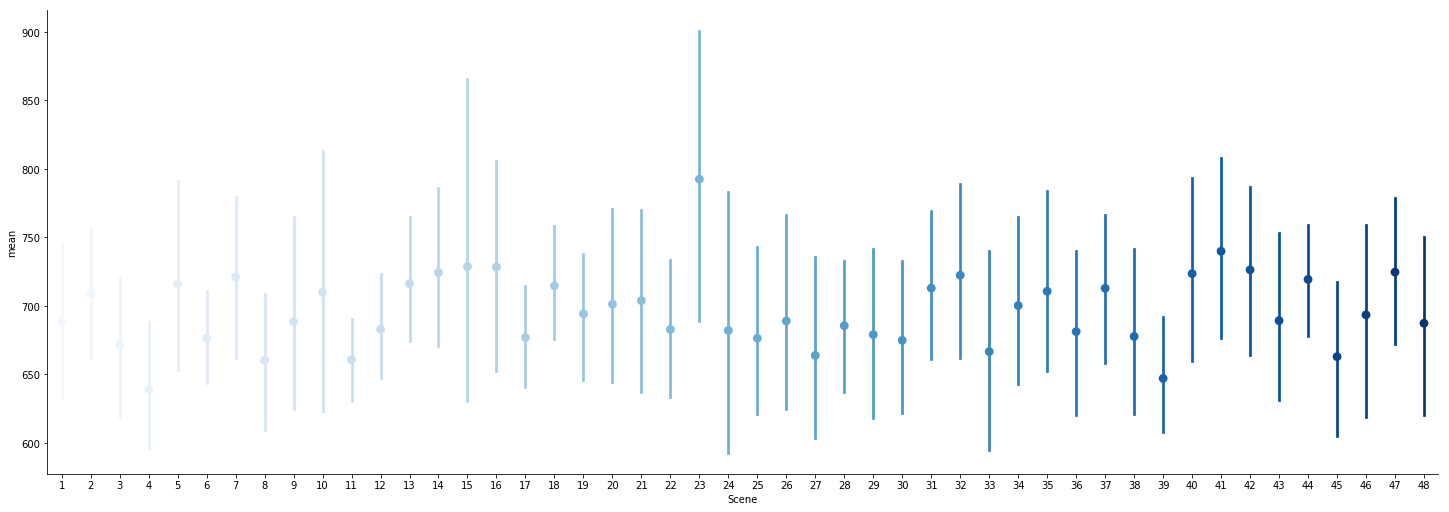

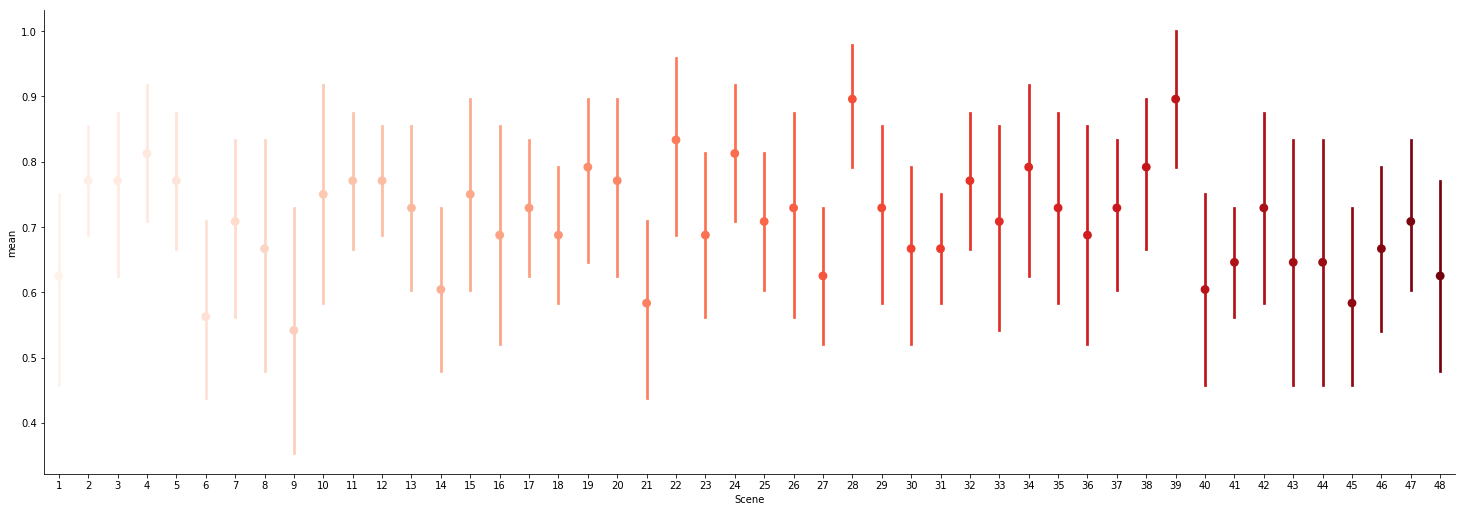

In [9]:
# Check performance on individual scenes

%matplotlib inline
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Scene', 'subCode'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Scene' , y = 'mean', data = aggRTdata, palette = 'Blues')

fig1 = plt.gcf() 
fig1.set_size_inches(25,8)

#Precision
groupedP = df.groupby(['Scene', 'subCode'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Scene' , y = 'mean', data = aggPrecdata, palette = 'Reds')

fig = plt.gcf() 
fig.set_size_inches(25,8)


In [ ]:
#By subject
%matplotlib inline
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggRTdata, hue = 'subCode', col = 'Delay')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggPrecdata, hue = 'subCode', col = 'Delay')




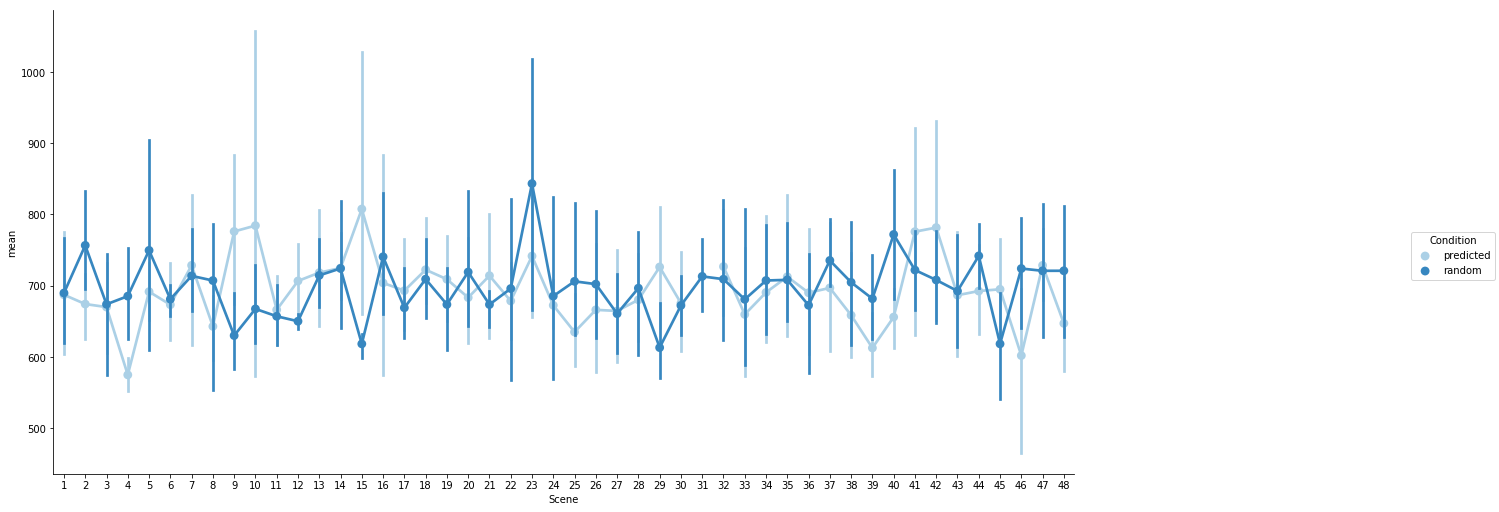

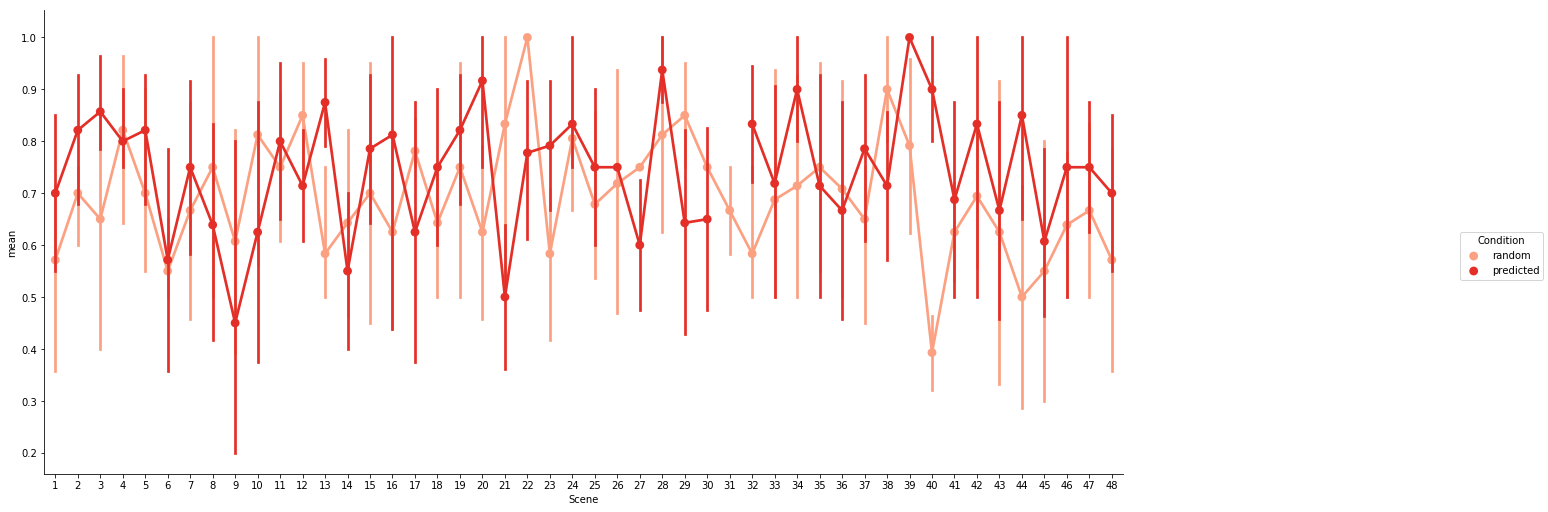

In [7]:
# Check performance on individual scenes -- plot it by condition

%matplotlib inline
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Scene', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Scene' , y = 'mean', data = aggRTdata, hue = 'Condition',  palette = 'Blues')

fig1 = plt.gcf() 
fig1.set_size_inches(25,8)

#Precision
groupedP = df.groupby(['Scene', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Scene' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')

fig = plt.gcf() 
fig.set_size_inches(25,8)

In [64]:
# Use linear mixed effects to check effects of non-relevant variables (scenes/targets etc)
import statsmodels.formula.api as smf

dfLME = df.dropna(subset = ['RT'])
dfLME['Scene'] = dfLME['Scene'].astype(str)


modelLMERT = smf.mixedlm("RT~Condition +  Delay ",dfLME, groups = dfLME['Critter'])
LMERTFit = modelLMERT.fit()
print(LMERTFit.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   RT         
No. Observations:     2209      Method:               REML       
No. Groups:           4         Scale:                29433.2051 
Min. group size:      526       Likelihood:           -14499.0838
Max. group size:      570       Converged:            Yes        
Mean group size:      552.2                                      
-----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept           699.549   17.644 39.649 0.000 664.969 734.130
Condition[T.random]  13.463    7.303  1.843 0.065  -0.852  27.777
Delay                 0.002    0.006  0.269 0.788  -0.010   0.014
Group Var           137.934    0.913                             



/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [63]:
LMERTFit.random_effects

{'1': Group    8.654397e-07
 dtype: float64, '10': Group   -0.000001
 dtype: float64, '11': Group   -0.000001
 dtype: float64, '12': Group    2.017596e-08
 dtype: float64, '13': Group    0.000002
 dtype: float64, '14': Group    0.000002
 dtype: float64, '15': Group    8.976901e-07
 dtype: float64, '16': Group    0.000001
 dtype: float64, '17': Group   -0.000001
 dtype: float64, '18': Group    8.843793e-07
 dtype: float64, '19': Group   -8.721603e-08
 dtype: float64, '2': Group    5.219197e-07
 dtype: float64, '20': Group   -8.375045e-07
 dtype: float64, '21': Group   -9.312792e-08
 dtype: float64, '22': Group   -0.000001
 dtype: float64, '23': Group    7.445081e-07
 dtype: float64, '24': Group   -0.000002
 dtype: float64, '25': Group   -0.000002
 dtype: float64, '26': Group    6.747125e-07
 dtype: float64, '27': Group   -0.000001
 dtype: float64, '28': Group   -0.000002
 dtype: float64, '29': Group   -0.000001
 dtype: float64, '3': Group   -7.793906e-07
 dtype: float64, '30': Group    

In [54]:
dfLME.to_csv('DataforLME.csv')

In [57]:
modelLMEAcc = smf.mixedlm("correct~Condition +  Delay",dfLME, groups = dfLME['Scene'])
LMEAccFit = modelLMEAcc.fit()
print(LMEAccFit.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   correct   
No. Observations:   2209      Method:               REML      
No. Groups:         48        Scale:                0.1894    
Min. group size:    42        Likelihood:           -1318.7223
Max. group size:    48        Converged:            Yes       
Mean group size:    46.0                                      
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.781    0.043 18.363 0.000  0.698  0.864
Condition[T.random] -0.056    0.019 -2.984 0.003 -0.093 -0.019
Delay               -0.000    0.000 -0.271 0.786 -0.000  0.000
Group Var            0.001    0.003                           



/anaconda2/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [58]:
LMEAccFit.random_effects

{'1': Group   -0.024929
 dtype: float64, '10': Group    0.004345
 dtype: float64, '11': Group    0.016443
 dtype: float64, '12': Group    0.00608
 dtype: float64, '13': Group    0.000482
 dtype: float64, '14': Group   -0.010919
 dtype: float64, '15': Group    0.008733
 dtype: float64, '16': Group   -0.007794
 dtype: float64, '17': Group    0.007007
 dtype: float64, '18': Group   -0.004577
 dtype: float64, '19': Group    0.015534
 dtype: float64, '2': Group    0.00608
 dtype: float64, '20': Group    0.022824
 dtype: float64, '21': Group   -0.024107
 dtype: float64, '22': Group    0.019572
 dtype: float64, '23': Group    0.001549
 dtype: float64, '24': Group    0.025583
 dtype: float64, '25': Group    0.00044
 dtype: float64, '26': Group    0.011168
 dtype: float64, '27': Group   -0.018584
 dtype: float64, '28': Group    0.040918
 dtype: float64, '29': Group    0.003363
 dtype: float64, '3': Group    0.010219
 dtype: float64, '30': Group   -0.012165
 dtype: float64, '31': Group   -0.0083

In [40]:
df['RT'] == NaN

NameError: name 'NaN' is not defined

In [33]:
df['Scene'] = df['Scene'].astype(str)

In [34]:
df['Scene']

0      15
1      27
2      11
3      12
4      45
5      26
6       7
7      42
8      39
9      23
10     14
11     22
12     29
13     10
14     21
15     33
16     47
17      1
18     18
19     28
20     41
21     19
22      9
23     32
24      8
25     16
26     43
27     37
28     35
29      4
       ..
162    41
163     1
164    16
165    20
166     4
167    31
168    11
169    12
170    43
171    39
172    40
173    30
174    35
175     6
176     3
177    19
178    38
179    45
180    25
181    46
182     2
183    47
184    23
185    17
186    10
187    15
188    33
189    42
190     7
191    22
Name: Scene, Length: 2304, dtype: object

### Plot for individual subjects

In [ ]:
# RT by validity by subject -- MOVIES
#A = df['correct'] == 1.0 
#B = df['kind'] == 'Mov'
#C = A&B
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'nRep'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep', y = 'mean', data = aggRTdataSub, hue = 'subCode', col =  'Delay')

# Precision by validity by subject -- MOVIES

groupedP = df.groupby(['Delay', 'subCode', 'nRep'])
grouped_P = groupedP['correct']
aggPrecdataSub = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggPrecdataSub, hue = 'subCode', col =  'Delay')

In [ ]:
# RT by validity by subject -- MOVIES
A = df['correct'] == 1.0 
B = df['blockType'] == 'learning1' 
D = df['blockType'] == 'testing1'
C = A&(B+D)
grouped = df[C].groupby(['Delay', 'subCode', 'nRep'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep', y = 'mean', data = aggRTdataSub, hue = 'subCode', col =  'Delay')

# Precision by validity by subject -- MOVIES

groupedP = df[B+D].groupby(['Delay', 'subCode', 'nRep'])
grouped_P = groupedP['correct']
aggPrecdataSub = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggPrecdataSub, hue = 'subCode', col =  'Delay')

In [ ]:
# RT by validity by subject -- MOVIES
A = df['correct'] == 1.0 
B = df['blockType'] == 'learning2' 
D = df['blockType'] == 'testing2'
C = A&(B+D)
grouped = df[C].groupby(['Delay', 'subCode', 'nRep'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep', y = 'mean', data = aggRTdataSub, hue = 'subCode', col =  'Delay')

# Precision by validity by subject -- MOVIES

groupedP = df[B+D].groupby(['Delay', 'subCode', 'nRep'])
grouped_P = groupedP['correct']
aggPrecdataSub = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggPrecdataSub, hue = 'subCode', col =  'Delay')

In [ ]:
# RT by validity by subject -- STATIC
A = df['correctAnswer'] == 1.0 
B = df['kind'] == 'Static'
C = A&B
grouped = df[C].groupby(['DelaySecs', 'subCode', 'nRepValidity'])
grouped_RT = grouped['recRT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRepValidity', order = ['1', '2', '3', '4', '5', '6', 'Invalid', 'Valid'] , y = 'mean', data = aggRTdataSub, hue = 'subCode', col =  'DelaySecs')

# Precision by validity by subject -- MOVIES

groupedP = df[df['kind'] == 'Static'].groupby(['DelaySecs', 'subCode', 'nRepValidity'])
grouped_P = groupedP['correctAnswer']
aggPrecdataSub = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRepValidity', order = ['1', '2', '3', '4', '5', '6', 'Invalid', 'Valid'] , y = 'mean', data = aggPrecdataSub, hue = 'subCode', col =  'DelaySecs')

In [ ]:
#A = aggRTdataSub.loc[(slice(0.75), slice(None), slice ('Invalid')), 'mean']

B = aggRTdataSub.loc[([0.75], slice(None), ['Invalid'], ['Static']), 'mean']
B
T1 = aggRTdataSub.loc[([0.75], slice(None), ['2'], ['Static']), 'mean']
C = aggRTdataSub.loc[([0.75], slice(None), ['3'], ['Static']), 'mean']
D = (T1 + C)/2
D
C

## Invalid vs learned comparisons

In [ ]:
# Compare valid vs invalid
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'nRep', 'blockType'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max'])
T1 = aggRTdataSub.loc[([3200.0], slice(0,6), ['Valid'], [ 'testing2']), 'mean'].mean(level = 'subCode')
T2 = aggRTdataSub.loc[([3200.0], slice(0,6), ['Invalid'], [ 'testing2']), 'mean'].mean(level= 'subCode')
print(T1)
print(T2)
ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)
sb.barplot(['Valid', 'Invalid'], [np.mean(T1), np.mean(T2)])

In [ ]:
T1

## Run regression analysis

In [ ]:
# Fit linear model to RT data for nRep 1 through 6
D = aggRTdata['nRep']
E = pd.to_numeric(D, errors = 'coerce')
LinearFitRT = aggRTdata.copy()
LinearFitRT['nRepValidity'] = E
#linearFitRT = aggRTdata[aggRTdata['nRepValidity'].to_numeric() <7 ]
LinearFitRT

In [ ]:
aggRTdataSub


In [ ]:
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'nRep', 'blockType'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max'])
#aggRTdataSub['nRep'] = str(aggRTdataSub['nRep'])
RegDat1= aggRTdataSub.loc[([2000.0, 3200.00], slice(0,6), ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'], ['learning1', 'learning2']), 'mean'].reset_index()
RegDat2 = aggRTdataSub.loc[([2000.0, 3200.00],slice(0,6), ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'], ['learning2']), 'mean'].reset_index()
RegDat1
# setup linear model

In [ ]:
# setup linear model movies
x = np.asarray(pd.to_numeric(RegDat1['nRep'], errors = 'coerce'))
y = np.asarray(RegDat1['mean'])
x = sm.add_constant(x)

model1 = sm.OLS(y, x).fit()
predictions = model1.predict()

model1.summary()

In [ ]:
# try linear mixed effects
import statsmodels.formula.api as smf
RegDat1['nRep']= pd.to_numeric(RegDat1['nRep'], errors = 'coerce')
modelLME1 = smf.mixedlm("mean~nRep", RegDat1, groups = RegDat1['subCode'])
LME1Fit = modelLME1.fit()
print(LME1Fit.summary())

In [ ]:
# try linear mixed effects
import statsmodels.formula.api as smf
RegDat2['nRep']= pd.to_numeric(RegDat2['nRep'], errors = 'coerce')
modelLME2 = smf.mixedlm("mean~nRep", RegDat2, groups = RegDat2['subCode'])
LME2Fit = modelLME2.fit()
print(LME2Fit.summary())

In [ ]:
# try linear mixed effects
import statsmodels.formula.api as smf
RegDatStatic['nRepValidity']= pd.to_numeric(RegDatStatic['nRepValidity'], errors = 'coerce')
modelLMEstatic = smf.mixedlm("mean~nRepValidity", RegDatStatic, groups = RegDatStatic['subCode'])
LMEstaticFit = modelLMEstatic.fit()
print(LMEstaticFit.summary())